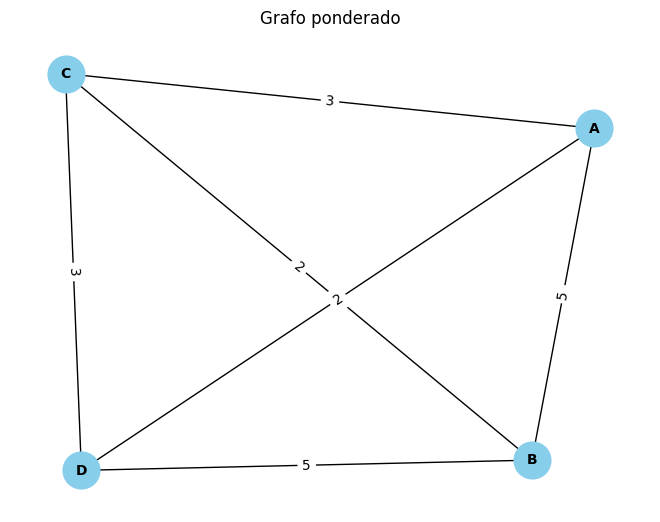

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

class Grafo:
    def __init__(self):
        self.vertices = {}

    def agregar_vertice(self, vertice):
        if vertice not in self.vertices:
            self.vertices[vertice] = {}

    def agregar_arista(self, vertice1, vertice2, distancia):
        self.agregar_vertice(vertice1)
        self.agregar_vertice(vertice2)
        self.vertices[vertice1][vertice2] = distancia
        self.vertices[vertice2][vertice1] = distancia

    def obtener_distancia(self, vertice1, vertice2):
        return self.vertices[vertice1][vertice2]

    def graficar(self):
        G = nx.Graph()
        for vertice, adyacentes in self.vertices.items():
            G.add_node(vertice)
            for adyacente, distancia in adyacentes.items():
                G.add_edge(vertice, adyacente, weight=distancia)

        pos = nx.spring_layout(G)  # Posición de los nodos en el gráfico
        labels = {edge: distancia for edge, distancia in nx.get_edge_attributes(G, 'weight').items()}

        nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.title("Grafo ponderado")
        plt.show()

# Ejemplo de uso
grafo = Grafo()
grafo.agregar_arista('A', 'B', 5)
grafo.agregar_arista('A', 'C', 3)
grafo.agregar_arista('B', 'C', 2)
grafo.agregar_arista('D', 'B', 5)
grafo.agregar_arista('D', 'C', 3)
grafo.agregar_arista('D', 'A', 2)

grafo.graficar()


# ***Recorrido backtracking***

['A', 'B', 'C', 'D']
['A', 'B', 'D', 'C']
['A', 'C', 'B', 'D']
['A', 'C', 'D', 'B']
['A', 'D', 'B', 'C']
['A', 'D', 'C', 'B']
['B', 'A', 'C', 'D']
['B', 'A', 'D', 'C']
['B', 'C', 'A', 'D']
['B', 'C', 'D', 'A']
['B', 'D', 'C', 'A']
['B', 'D', 'A', 'C']
['C', 'A', 'B', 'D']
['C', 'A', 'D', 'B']
['C', 'B', 'A', 'D']
['C', 'B', 'D', 'A']
['C', 'D', 'B', 'A']
['C', 'D', 'A', 'B']
['D', 'B', 'A', 'C']
['D', 'B', 'C', 'A']
['D', 'C', 'A', 'B']
['D', 'C', 'B', 'A']
['D', 'A', 'B', 'C']
['D', 'A', 'C', 'B']


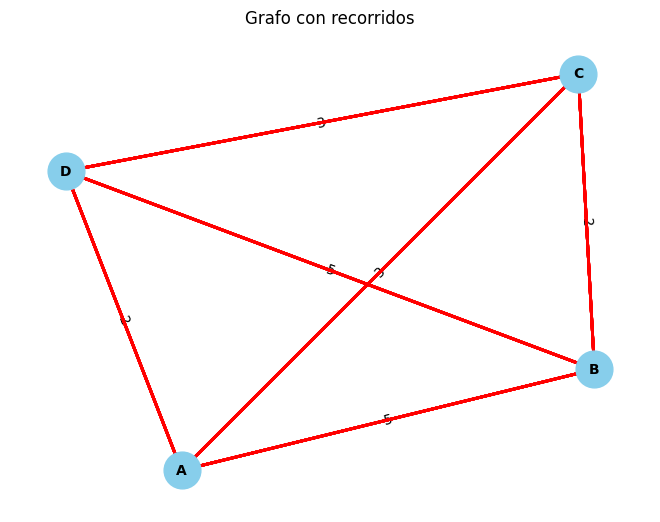

In [17]:
class Grafo:
    def __init__(self):
        self.vertices = {}

    def agregar_vertice(self, vertice):
        if vertice not in self.vertices:
            self.vertices[vertice] = {}

    def agregar_arista(self, vertice1, vertice2, distancia):
        self.agregar_vertice(vertice1)
        self.agregar_vertice(vertice2)
        self.vertices[vertice1][vertice2] = distancia
        self.vertices[vertice2][vertice1] = distancia  # Si el grafo es no dirigido

    def obtener_distancia(self, vertice1, vertice2):
        return self.vertices[vertice1][vertice2]

    def obtener_adyacentes(self, vertice):
        return list(self.vertices[vertice].keys())

    def recorrido_backtracking(self, vertice_actual, visitados, recorrido_actual, recorridos):
        visitados.add(vertice_actual)
        recorrido_actual.append(vertice_actual)

        if len(visitados) == len(self.vertices):
            recorridos.append(list(recorrido_actual))
        else:
            for adyacente in self.obtener_adyacentes(vertice_actual):
                if adyacente not in visitados:
                    self.recorrido_backtracking(adyacente, visitados, recorrido_actual, recorridos)

        visitados.remove(vertice_actual)
        recorrido_actual.pop()

    def encontrar_recorridos(self):
        recorridos = []
        for vertice in self.vertices:
            visitados = set()
            recorrido_actual = []
            self.recorrido_backtracking(vertice, visitados, recorrido_actual, recorridos)
        return recorridos

    def graficar(self):
        G = nx.Graph()
        for vertice, adyacentes in self.vertices.items():
            G.add_node(vertice)
            for adyacente, distancia in adyacentes.items():
                G.add_edge(vertice, adyacente, weight=distancia)

        pos = nx.spring_layout(G)  # Posición de los nodos en el gráfico
        labels = {edge: distancia for edge, distancia in nx.get_edge_attributes(G, 'weight').items()}

        nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

        for recorrido in self.encontrar_recorridos():
            recorrido_edges = [(recorrido[i], recorrido[i+1]) for i in range(len(recorrido) - 1)]
            nx.draw_networkx_edges(G, pos, edgelist=recorrido_edges, edge_color='red', width=2)

        plt.title("Grafo con recorridos")
        plt.show()


# Ejemplo de uso
grafo = Grafo()
grafo.agregar_arista('A', 'B', 5)
grafo.agregar_arista('A', 'C', 3)
grafo.agregar_arista('B', 'C', 2)
grafo.agregar_arista('D', 'B', 5)
grafo.agregar_arista('D', 'C', 3)
grafo.agregar_arista('D', 'A', 2)

todos_recorridos = grafo.encontrar_recorridos()
for recorrido in todos_recorridos:
    print(recorrido)

grafo.graficar()

# ***Algoritmo floyd***

[0, 5, 3, 5, inf]
[5, 0, 2, 4, inf]
[3, 2, 0, 2, inf]
[5, 4, 2, 0, inf]
[inf, inf, inf, inf, 0]


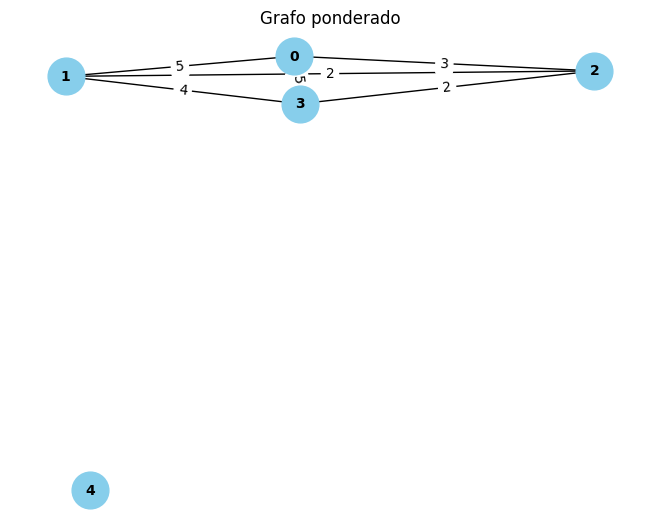

In [15]:
class Grafo:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.indice_vertices = {}
        self.matriz_distancias = [[float('inf')] * num_vertices for _ in range(num_vertices)]

    def agregar_arista(self, origen, destino, peso):
        if origen not in self.indice_vertices:
            self.indice_vertices[origen] = len(self.indice_vertices)
        if destino not in self.indice_vertices:
            self.indice_vertices[destino] = len(self.indice_vertices)

        indice_origen = self.indice_vertices[origen]
        indice_destino = self.indice_vertices[destino]

        self.matriz_distancias[indice_origen][indice_destino] = peso
        self.matriz_distancias[indice_destino][indice_origen] = peso

    def algoritmo_floyd(self):
        distancias = self.matriz_distancias

        # Inicializar la diagonal con ceros
        for i in range(self.num_vertices):
            distancias[i][i] = 0

        # Aplicar el algoritmo de Floyd
        for k in range(self.num_vertices):
            for i in range(self.num_vertices):
                for j in range(self.num_vertices):
                    distancias[i][j] = min(distancias[i][j], distancias[i][k] + distancias[k][j])

        return distancias
    def graficar(self):
        G = nx.Graph()
        for i in range(self.num_vertices):
            G.add_node(i)
        for i in range(self.num_vertices):
            for j in range(i + 1, self.num_vertices):
                if self.matriz_distancias[i][j] != float('inf'):
                    G.add_edge(i, j, weight=self.matriz_distancias[i][j])

        pos = nx.spring_layout(G)  # Posición de los nodos en el gráfico
        labels = {edge: distancia for edge, distancia in nx.get_edge_attributes(G, 'weight').items()}

        nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.title("Grafo ponderado")
        plt.show()

# Ejemplo de uso
grafo = Grafo(5)
grafo.agregar_arista('A', 'B', 5)
grafo.agregar_arista('A', 'C', 3)
grafo.agregar_arista('B', 'C', 2)
grafo.agregar_arista('D', 'C', 2)

matriz_distancias = grafo.algoritmo_floyd()
for fila in matriz_distancias:
    print(fila)

grafo.graficar()


# ***Dijkstra***

Distancias desde el vértice A: {'A': 0, 'B': 5, 'C': 3, 'D': inf}
Distancias desde el vértice B: {'A': inf, 'B': 0, 'C': 2, 'D': inf}


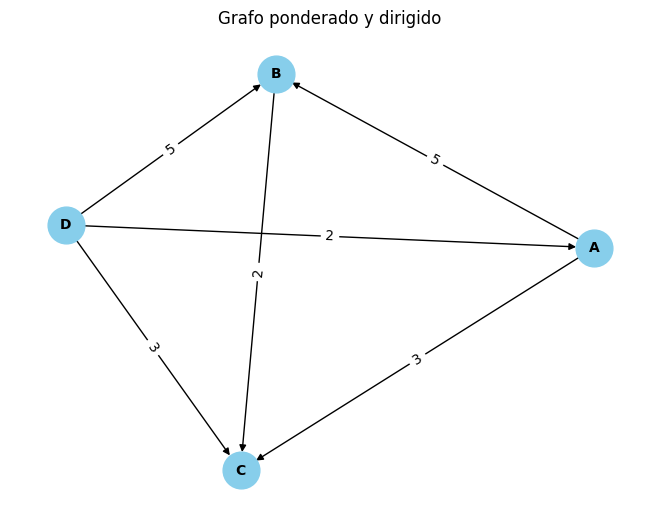

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

class Grafo:
    def __init__(self):
        self.vertices = {}

    def agregar_vertice(self, vertice):
        if vertice not in self.vertices:
            self.vertices[vertice] = {}

    def agregar_arista(self, vertice1, vertice2, distancia):
        self.agregar_vertice(vertice1)
        self.agregar_vertice(vertice2)
        self.vertices[vertice1][vertice2] = distancia

    def dijkstra(self, origen):
        distancias = {vertice: float('inf') for vertice in self.vertices}
        distancias[origen] = 0
        visitados = set()
        heap = [(0, origen)]  # (distancia, vertice)
        while heap:
            distancia_actual, vertice_actual = heapq.heappop(heap)
            if vertice_actual in visitados:
                continue
            visitados.add(vertice_actual)
            for adyacente, distancia in self.vertices[vertice_actual].items():
                nueva_distancia = distancia_actual + distancia
                if nueva_distancia < distancias[adyacente]:
                    distancias[adyacente] = nueva_distancia
                    heapq.heappush(heap, (nueva_distancia, adyacente))
        return distancias

    def graficar(self):
        G = nx.DiGraph()
        for vertice, adyacentes in self.vertices.items():
            G.add_node(vertice)
            for adyacente, distancia in adyacentes.items():
                G.add_edge(vertice, adyacente, weight=distancia)

        pos = nx.spring_layout(G)  # Posición de los nodos en el gráfico
        labels = {edge: distancia for edge, distancia in nx.get_edge_attributes(G, 'weight').items()}

        nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.title("Grafo ponderado y dirigido")
        plt.show()

# Ejemplo de uso
grafo = Grafo()
grafo.agregar_arista('A', 'B', 5)
grafo.agregar_arista('A', 'C', 3)
grafo.agregar_arista('B', 'C', 2)
grafo.agregar_arista('D', 'B', 5)
grafo.agregar_arista('D', 'C', 3)
grafo.agregar_arista('D', 'A', 2)

print("Distancias desde el vértice A:", grafo.dijkstra('A'))
print("Distancias desde el vértice B:", grafo.dijkstra('B'))

grafo.graficar()
